In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
#importar bibliotecas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [3]:
#carregar dados para o dataframe
df_heart=pd.read_csv('../input/heart-disease-uci/heart.csv', sep=',')

In [4]:
#verificar os tipos de dados
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#verificar o shape
print (df_heart.shape)

(303, 14)


In [6]:
#verificar quantidade  de instancias nulas por atributo
nans = df_heart.isna().sum()
print(nans[nans > 0])

Series([], dtype: int64)


In [7]:
#separar os atributos idade e frequencia  cardiaca maxima alcançada
df_heart_clean = df_heart[['age','thalach']].copy()

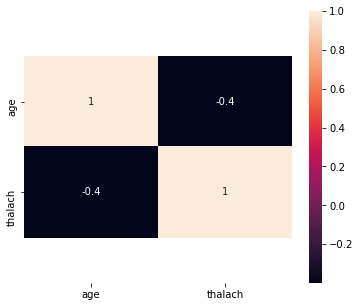

In [8]:
#verificar a correlação entre a idade e a frequencia cardiaca máxima alcançada
plt.figure(figsize=(6,5))
df_corr_ = df_heart_clean.corr()
ax_ = sns.heatmap(df_corr_, annot=True)
bottom, top = ax_.get_ylim()
ax_.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [9]:
# Separar os dados entre treino e teste')
X = df_heart.drop('target', axis=1)
Y = df_heart['target']
split_test_size = 0.3 #Definindo a taxa de split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size)

In [10]:
#utilizar o modelo Regressão Logística
modelo = LogisticRegression(solver='lbfgs', max_iter=10000) #criar o modelo
modelo.fit(X_treino, Y_treino.ravel()) #treinar o modelo
lr_predict_test = modelo.predict(X_teste) #aplicar predição com os dados de teste

In [11]:
#medir a acuracia do modelo sobre os dados de teste
acuracia = accuracy_score(Y_teste, lr_predict_test)
print('Acurácia da RL: ',acuracia)

Acurácia da RL:  0.8791208791208791


In [12]:
#criar Confusion Matrix
print('Matriz de Confusão: ')
print(pd.crosstab(Y_teste,lr_predict_test,rownames=['Real'],colnames=['Predito'],margins=True))

Matriz de Confusão: 
Predito   0   1  All
Real                
0        34   9   43
1         2  46   48
All      36  55   91


In [13]:
#exibir relatorio de classificação
print('Relatório de Classificação: ')
print(classification_report(Y_teste,lr_predict_test))

Relatório de Classificação: 
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        43
           1       0.84      0.96      0.89        48

    accuracy                           0.88        91
   macro avg       0.89      0.87      0.88        91
weighted avg       0.89      0.88      0.88        91

